In [54]:
import os
import numpy as np
from scipy import signal

%matplotlib inline

c:\Users\chazp\OneDrive\Documents\ECE 420\Lab 2


In [55]:

from scipy.io.wavfile import read, write
sampling_rate, data = read('with_hum.wav')

In [56]:

from IPython.display import Audio
Audio('with_hum.wav')

400.0382968829073


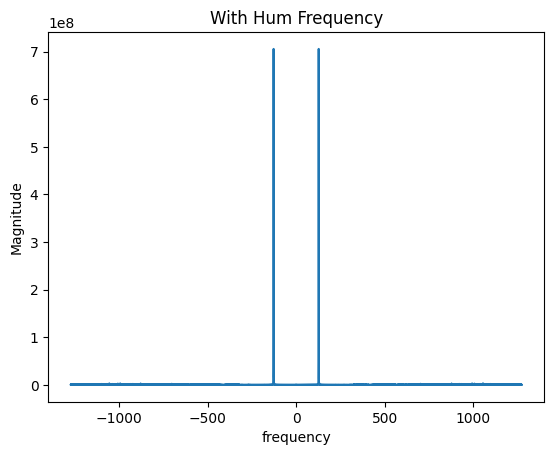

In [57]:
import matplotlib.pyplot as plt
t = np.arange(len(data))
sp = np.fft.fft(data)
freq = np.fft.fftfreq(t.shape[0])
plt.plot(freq/np.pi*sampling_rate, np.abs(sp))
plt.title("With Hum Frequency")
plt.xlabel('frequency')
plt.ylabel("Magnitude")
print(freq[np.argmax(sp)]*sampling_rate)

In [58]:
nyq = 0.5*sampling_rate

b,a = signal.butter(4,[300/nyq,500/nyq],btype = 'bandstop',analog = False)

Text(0, 0.5, 'Magnitude')

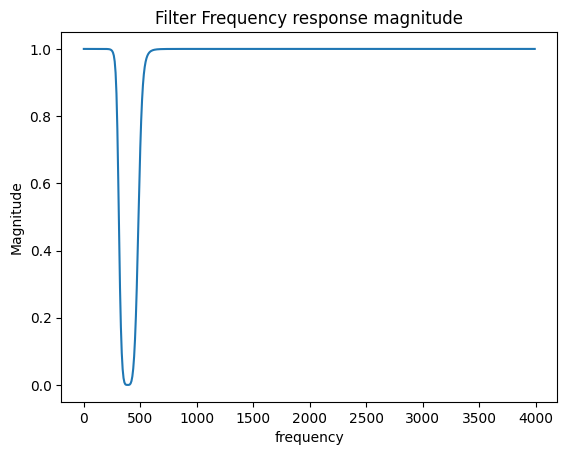

In [59]:
w, h = signal.freqz(b,a)
plt.plot(w *sampling_rate/2/np.pi,np.abs(h))
plt.title("Filter Frequency response magnitude")
plt.xlabel('frequency')
plt.ylabel("Magnitude")

Question Answer: I wanted to filter out 400hz so I created a bandstop butterworth filter with a desired stopband of 380-420. I used a order 4 filter to minimize the transition band at the minor cost of some stop band attenuation. This filter could work with Order 3 but I felt it was unnecesary.

Text(0, 0.5, 'phase')

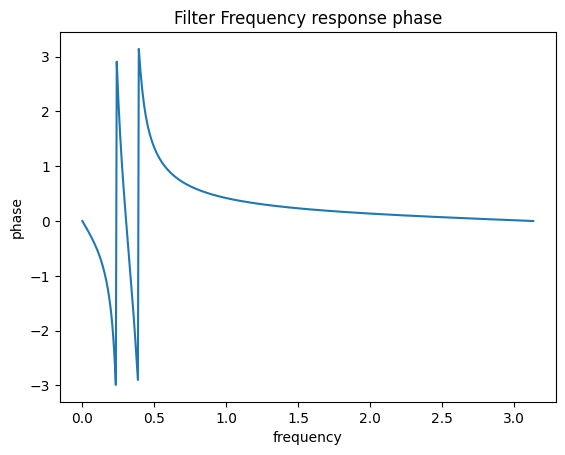

In [60]:

plt.plot(w,np.angle(h))
plt.title("Filter Frequency response phase")
plt.xlabel('frequency')
plt.ylabel("phase")

Text(0, 0.5, 'Magnitude')

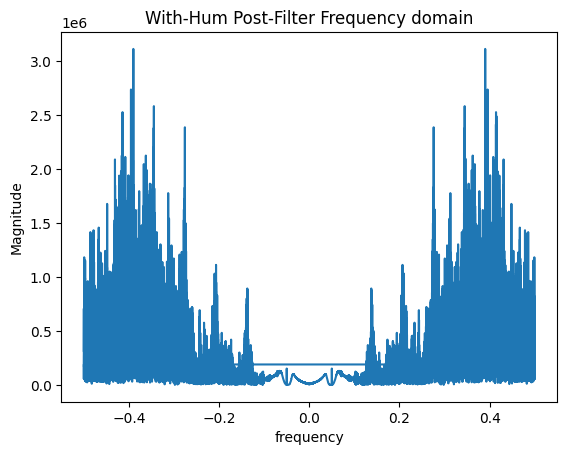

In [61]:
output = signal.lfilter(b,a,data).astype('int')


t = np.arange(len(output))
amp = np.fft.fft(output)
freq = np.fft.fftfreq(t.shape[0])
plt.plot(freq, np.abs(amp))
plt.title("With-Hum Post-Filter Frequency domain")
plt.xlabel('frequency')
plt.ylabel("Magnitude")

In [62]:
noHumRate, noHumData = read('without_hum.wav')

t = np.arange(len(noHumData))
amp = np.fft.fft(noHumData)
freq = np.fft.fftfreq(t.shape[0])
plt.plot(freq, np.abs(amp))
plt.title("Without Hum Frequency domain")
plt.xlabel('frequency')
plt.ylabel("Magnitude")

Text(0, 0.5, 'Magnitude')

In [ ]:
audio = write("filtered_output.wav", rate = sampling_rate , data = 10000*output)
Audio('filtered_output.wav')